In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path('__file__').resolve().parent.parent))

In [2]:
from itertools import cycle

import matplotlib as mpl

from hundun.equations.henon import Henon
from hundun.equations.logistic import Logistic
from hundun.equations.lorenz import Lorenz
from hundun.lyapunov._les_differential import (calc_les_differential,
                                               calc_les_differential_w_qr,
                                               calc_max_le_differential,
                                               calc_les_differential_w_orth)
from hundun.lyapunov._les_difference import calc_les_difference
from hundun.lyapunov import calc_les
from hundun.utils._draw import Drawing

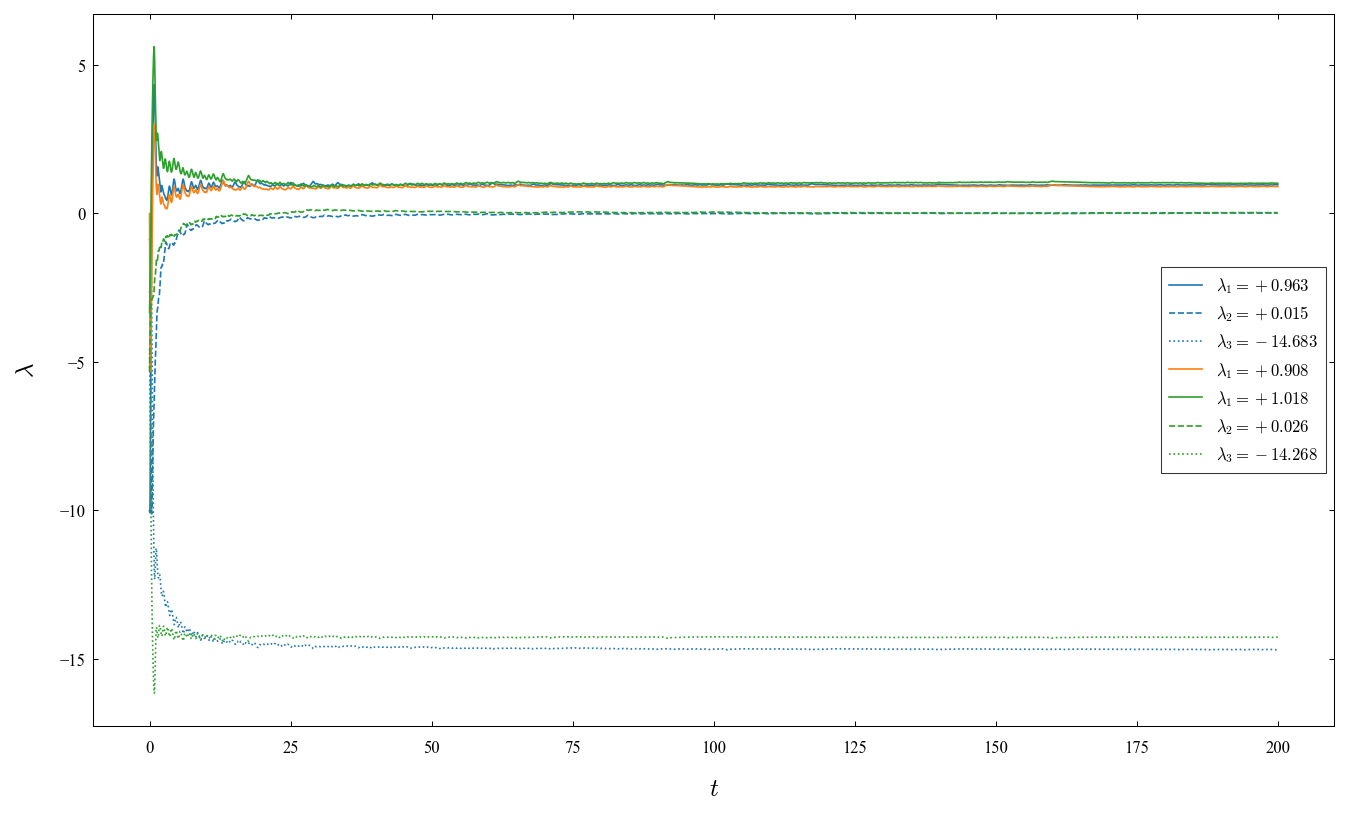

In [3]:
color = cycle(mpl.rcParams['axes.prop_cycle'])
line = ['-', '--', ':']

d = Drawing()

u0 = Lorenz.on_attractor().u

N_1 = 200000
h_1 = 0.001
les_list, les = calc_les_differential_w_qr(Lorenz, h=h_1, N=N_1, u0=u0)
c = next(color)['color']
for i in range(3):
    d[0,0].plot([j*h_1 for j in range(N_1)], les_list[:, i],
            label=fr'$\lambda_{i+1}={les[i]:+.3f}$',
            color=c, linestyle=line[i])

N_2 = 20000
h_2 = 0.01
le_list, l_1 = calc_max_le_differential(Lorenz, h=h_2, N=N_2, u0=u0)
c = next(color)['color']
d[0,0].plot([i*h_2*10 for i in range(len(le_list))], le_list,
        label=fr'$\lambda_1={l_1:+.3f}$',
        color=c, linestyle=line[0])

N_3 = 20000
h_3 = 0.01
les_list, les = calc_les_differential_w_orth(Lorenz, h=h_3, N=N_3, u0=u0)
c = next(color)['color']
for i in range(3):
    l = les_list[:,i]
    d[0,0].plot([i*h_3 for i in range(len(l))], l,
                label=fr'$\lambda_{i+1}={les[i]:+.3f}$',
                color=c, linestyle=line[i])

d[0,0].set_axis_label('t', r'\lambda')
d[0,0].legend()
d.show()


In [4]:
class A(Lorenz):
    def jacobian(self):
        return None

In [5]:
for model in [Lorenz, A]:
    _, les = calc_les_differential(model)
    print(f'{model.__name__} -> {les}')

Lorenz -> [ 9.49612144e-01  5.00992857e-03 -1.46581163e+01]
A -> [1.1391814678006598, -0.13856389606668476, -14.245290840695871]


In [6]:
for model in [Henon, Logistic]:
    print(f'{model.__name__} -> {calc_les_difference(model, 5000)}')

Henon -> [ 0.43319467 -1.63675148]
Logistic -> 0.693207598764841


In [7]:
for system in [Henon, Lorenz]:
    calc_les(system)